# Emissões de CO₂ per capita

Emissões de dióxido de carbono (CO₂) provenientes da queima de combustíveis fósseis e de processos industriais.

---

- Fonte: Our World in Data - https://ourworldindata.org
- Licença: Dados disponíveis sob licença Creative Commons BY

## 1. Análise Exploratória dos Dados

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1 Leitura dos dados

In [40]:
df = pd.read_csv('../data/raw/co-emissions-per-capita.csv')
df

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123
...,...,...,...,...
26273,Zimbabwe,ZWE,2019,0.672038
26274,Zimbabwe,ZWE,2020,0.547083
26275,Zimbabwe,ZWE,2021,0.645913
26276,Zimbabwe,ZWE,2022,0.648759


### 1.2 Apresentação dos dados

In [42]:
print(f"Período temporal: {df['Year'].min()} - {df['Year'].max()}")
print(f"Número de instâncias: {len(df)}")
print(f"Número de atributos: {len(df.columns)}")
print(f"Atributos: {list(df.columns)}")

Período temporal: 1750 - 2023
Número de instâncias: 26278
Número de atributos: 4
Atributos: ['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)']


### 1.3 Verificar valores nulos

In [46]:
df.isnull().sum()

Entity                                  0
Code                                 3287
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64

### 1.4 Verificar duplicatas

In [47]:
df.duplicated().sum()

np.int64(0)

### 1.5 Análise de tipos de dados

In [48]:
df.dtypes

Entity                                object
Code                                  object
Year                                   int64
Annual CO₂ emissions (per capita)    float64
dtype: object

### 1.6 Verificar consistência dos códigos de países

In [49]:
print(f"Países únicos: {df['Entity'].nunique()}")
print(f"Códigos únicos: {df['Code'].nunique()}")
print(f"Países sem código: {df[df['Code'].isnull()]['Entity'].nunique()}")

Países únicos: 231
Códigos únicos: 215
Países sem código: 16


### 1.7 Identificar regiões/continentes que não possuem código

In [51]:
df[df['Code'].isnull()]['Entity'].unique()

array(['Africa', 'Asia', 'Asia (excl. China and India)', 'Europe',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America',
       'North America (excl. USA)', 'Oceania', 'South America',
       'Upper-middle-income countries'], dtype=object)

### 1.8 Estatísticas básicas das emissões

In [52]:
df['Annual CO₂ emissions (per capita)'].describe()

count    26278.000000
mean         3.803211
std         14.358481
min          0.000000
25%          0.168862
50%          1.007286
75%          4.282712
max        782.682070
Name: Annual CO₂ emissions (per capita), dtype: float64

## 2. Visualização dos dados

### Q1. Evolução Comparativa das Emissões de CO₂ per Capita por Continente

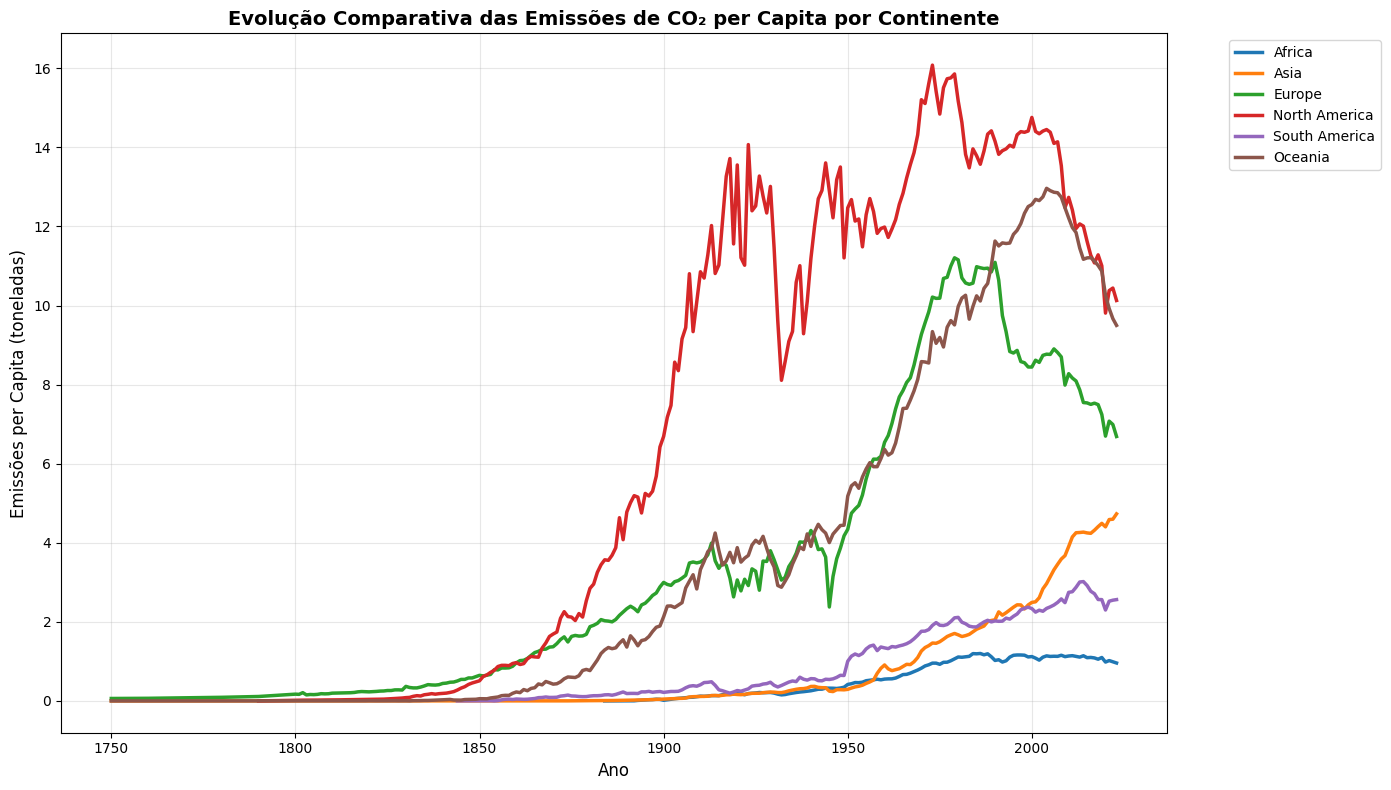

In [58]:
# Definir continentes para análise
continentes = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
df_continentes = df[df['Entity'].isin(continentes)]

# Criar gráfico comparativo
plt.figure(figsize=(14, 8))
for continente in continentes:
    dados = df_continentes[df_continentes['Entity'] == continente]
    plt.plot(dados['Year'], dados['Annual CO₂ emissions (per capita)'],
            label=continente, linewidth=2.5)

plt.title('Evolução Comparativa das Emissões de CO₂ per Capita por Continente',
          fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões per Capita (toneladas)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Q2. Comparação das Emissões Médias: Países Desenvolvidos vs em Desenvolvimento

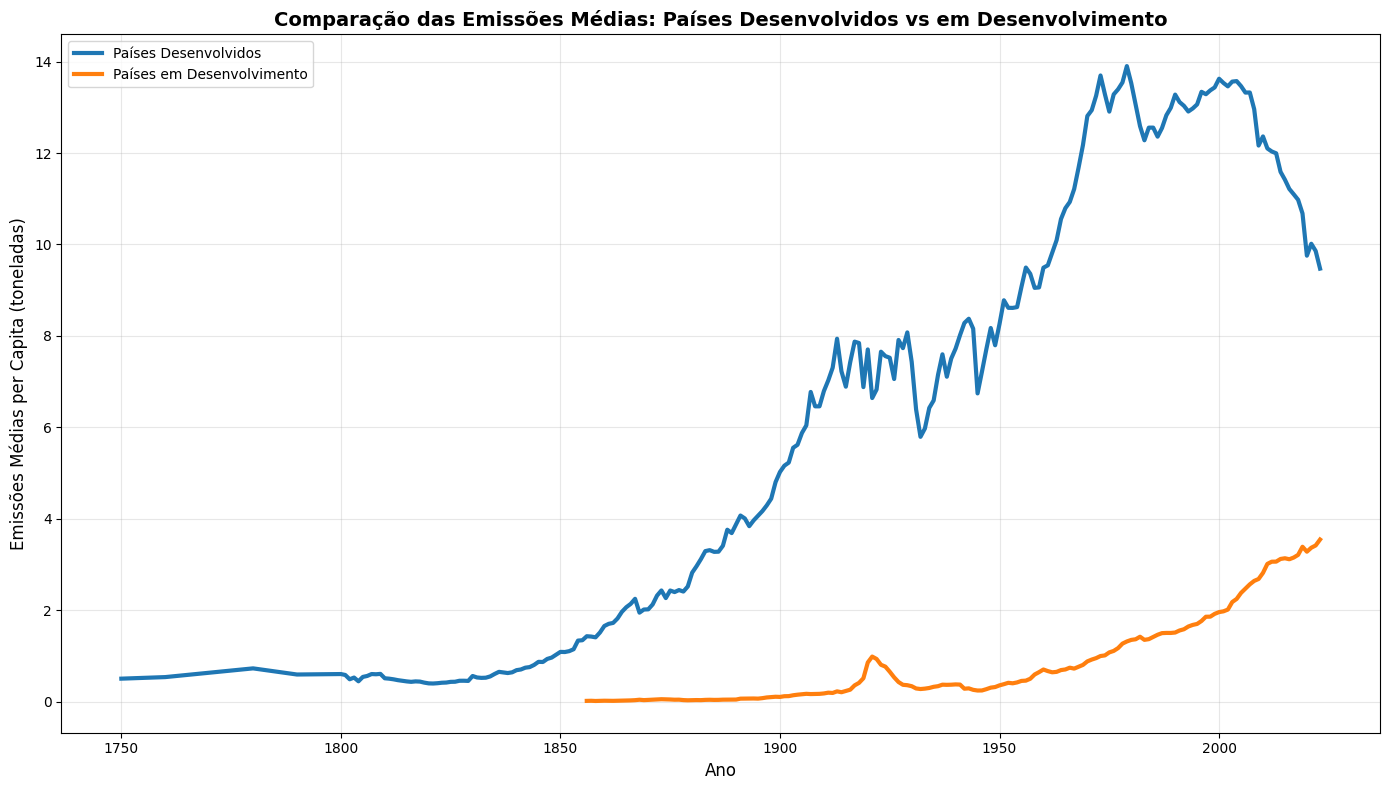

In [59]:
# Definir grupos de países
desenvolvidos = ['United States', 'United Kingdom', 'Germany', 'France', 'Japan', 'Canada', 'Australia']
em_desenvolvimento = ['China', 'India', 'Brazil', 'Mexico', 'Indonesia', 'Vietnam', 'Egypt']

# Calcular médias por grupo
df_dev = df[df['Entity'].isin(desenvolvidos)]
df_em_dev = df[df['Entity'].isin(em_desenvolvimento)]

media_dev = df_dev.groupby('Year')['Annual CO₂ emissions (per capita)'].mean()
media_em_dev = df_em_dev.groupby('Year')['Annual CO₂ emissions (per capita)'].mean()

# Gráfico comparativo
plt.figure(figsize=(14, 8))
plt.plot(media_dev.index, media_dev.values, label='Países Desenvolvidos', linewidth=3)
plt.plot(media_em_dev.index, media_em_dev.values, label='Países em Desenvolvimento', linewidth=3)

plt.title('Comparação das Emissões Médias: Países Desenvolvidos vs em Desenvolvimento',
          fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões Médias per Capita (toneladas)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Q3. Evolução da Distribuição Global das Emissões de CO₂ per Capita por Década

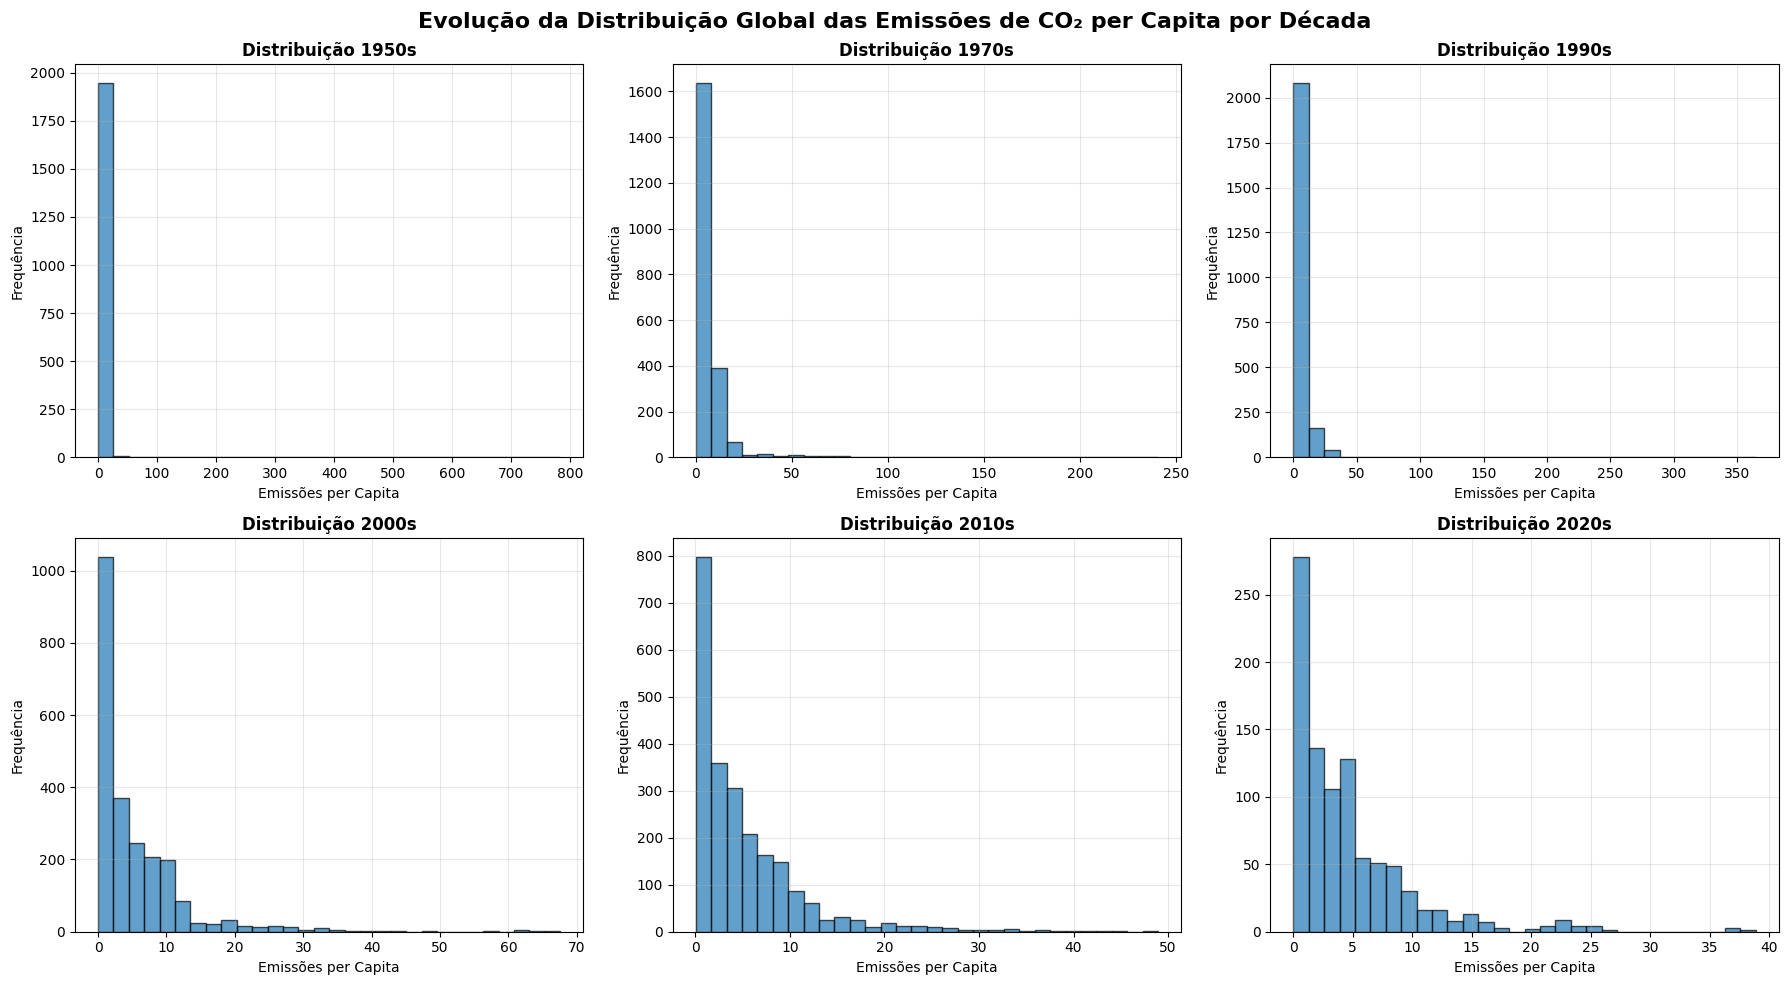

In [ ]:
# Adicionar coluna de década
df['Decada'] = (df['Year'] // 10) * 10
decadas_selecionadas = [1950, 1970, 1990, 2000, 2010, 2020]

# Criar subplots em um grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, decada in enumerate(decadas_selecionadas):
    dados_decada = df[df['Decada'] == decada]
    axes[i].hist(
        dados_decada['Annual CO₂ emissions (per capita)'],
        bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribuição {decada}s', fontweight='bold')
    axes[i].set_xlabel('Emissões per Capita')
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True, alpha=0.3)

plt.suptitle(
    'Evolução da Distribuição Global das Emissões de CO₂ per Capita por Década',
    fontsize=16,
    fontweight='bold'
)
plt.tight_layout()
plt.show()